In [3]:
# Questão 1

import yfinance as yh
yh.pdr_override()
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

acoes_escolhidas = ['PETR4.SA', 'VALE3.SA', 'KLBN4.SA', 'EMBR3.SA', 'ABEV3.SA', '^BVSP']

start = dt.datetime(2017, 1, 1)
end = dt.datetime(2022, 1, 1)

cotacoes = web.get_data_yahoo(acoes_escolhidas, start=start, end=end) # Importando as cotações
cotacoes_adj = cotacoes['Adj Close'] # Selecionando apenas os fechamentos ajustados

logreturn = np.log(cotacoes_adj).diff() # Retorno logarítmo
logreturn = logreturn.drop(logreturn.index[0]) # Tirando a primeira linha, pois é ela é composta de NaNs

    # Montando o portfolio escolhendo um peso para cada ativo
    # (PETR4.SA = 20%, VALE3.SA = 60%, KLBN4.SA = 10%, EMBR3.SA = 7%, ABEV3.SA = 3%)
    
logportfolio = 0.2*logreturn['PETR4.SA'] + 0.6*logreturn['VALE3.SA'] + 0.1*logreturn['KLBN4.SA'] + 0.07*logreturn['EMBR3.SA'] + 0.03*logreturn['ABEV3.SA']
     
logportfolio_norm = (logportfolio - logportfolio.mean())/logportfolio.std() # Normalizando os retornos logarítmos
print('Retornos logarítmos do portfolio normalizados')
display(logportfolio_norm)

    # Quando normalizamos um conjunto de dados nós transformamos eles para uma nova medida mais apropriada para analisar a sua distribuição.
    # Ao fazermos este processo, nós conseguimos saber o quanto que cada observação está afastada da média, medida como um múltiplo
    # do desvio padrão dos dados. A normalização serve também para deixar todos os valores em uma escala comum.

[*********************100%***********************]  6 of 6 completed
Retornos logarítmos do portfolio normalizados


Date
2017-01-03    1.929474
2017-01-04   -0.674426
2017-01-05    1.308504
2017-01-06   -0.925667
2017-01-09    0.273439
                ...   
2021-12-23   -0.153472
2021-12-27    0.080914
2021-12-28   -0.757334
2021-12-29   -0.065977
2021-12-30    0.293028
Length: 1242, dtype: float64

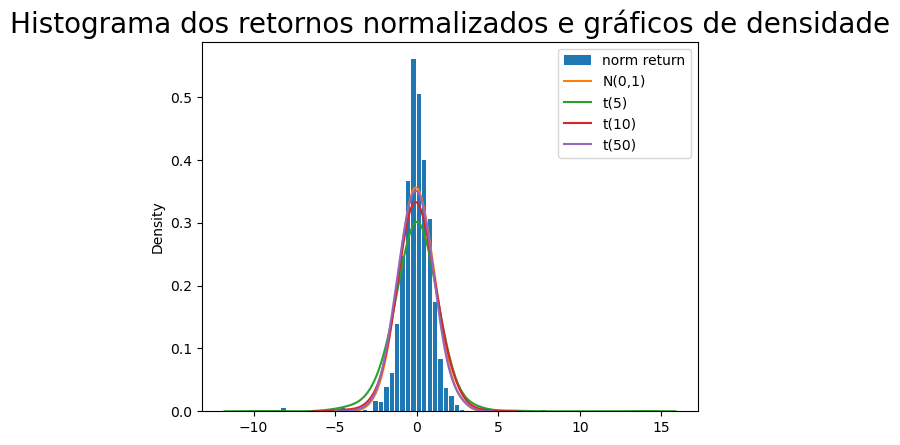

In [2]:
# Questão 2

import scipy.stats as stats
from scipy.stats import t
import seaborn as sns

# Definindo a distribuição normal e os seus parâmetros   
mu, sigma = 0, 1  
normal = np.random.normal(mu, sigma, 1242)

# Definindo as três distribuições t de Student
t_5 = t.rvs(df=5, size=1242)
t_10 = t.rvs(df=10, size=1242)
t_50 = t.rvs(df=50, size=1242)

# Plotando
plt.title('Histograma dos retornos normalizados e gráficos de densidade', fontsize=20)
plt.hist(logportfolio_norm, 50, rwidth=0.8, density = True, label='norm return') 
sns.kdeplot(normal, bw_method=0.5, label='N(0,1)')
sns.kdeplot(t_5, bw_method=0.5, label='t(5)')
sns.kdeplot(t_10, bw_method=0.5, label='t(10)')
sns.kdeplot(t_50, bw_method=0.5, label='t(50)')
plt.legend()
plt.show()

    # A distribuição t tem formato de sino e é simétrica como a distribuição normal. 
    # A diferença é que a t possui caudas mais pesadas, ou seja, ela produz valores mais afastados da sua média em comparação com a normal.

In [ ]:
# Questão 3

# Assumindo que os log retornos são normais, vamos calcular a probabilidade de termos um retorno maior do que 3%

1 - stats.norm(logportfolio.mean(), logportfolio.std()).cdf(0.03)

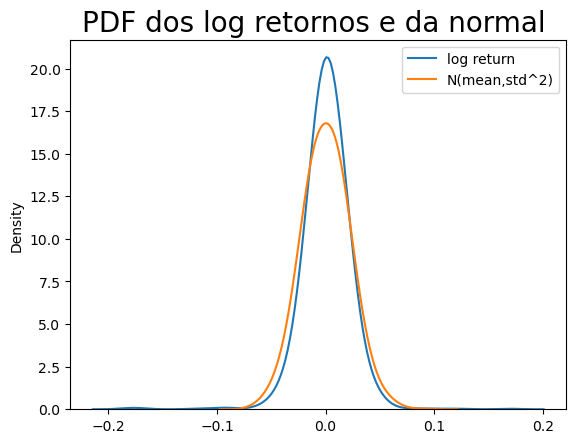

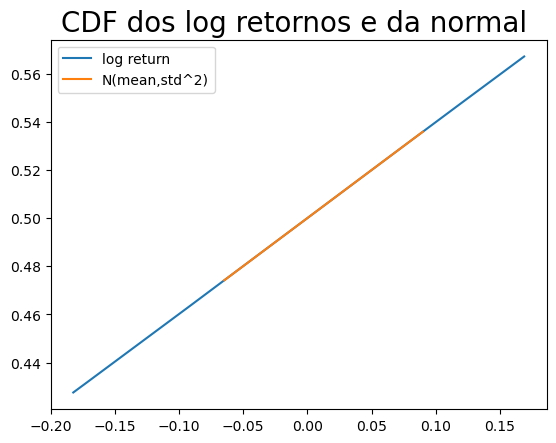

In [3]:
# Questão 4

# Nesta questão optei por plotar também a PDF e a CDF de uma normal com média e desvio padrão iguais ao dos log retornos

# Definindo a normal 
mean, std = logportfolio.mean(), logportfolio.std()  
normal_2 = np.random.normal(mean, std, 1242)

# Plotando as PDFs 
plt.title('PDF dos log retornos e da normal ', fontsize=20)
sns.kdeplot(logportfolio, bw_method=0.5, label='log return')
sns.kdeplot(normal_2, bw_method=0.5, label='N(mean,std^2)') 
plt.legend()
plt.show()

# Plotando as CDFs
normal_2_sorted = np.sort(normal_2) # ordenando as variáveis
logportfolio_sorted = np.sort(logportfolio)

cdf_norm = stats.norm.cdf(normal_2_sorted) # definindo as CDFs
cdf_logport = stats.norm.cdf(logportfolio_sorted)

plt.title('CDF dos log retornos e da normal ', fontsize=20)
plt.plot(logportfolio_sorted, cdf_logport, label='log return')
plt.plot(normal_2_sorted, cdf_norm, label='N(mean,std^2)')
plt.legend()
plt.show()

In [4]:
# Questão 5

# Calculando a curtose e a simetria dos log retornos e da normal padrão

print('Kurtose dos log retornos')
display(stats.kurtosis(logportfolio, fisher=True))
print('Kurtose da normal padrão')
display(stats.kurtosis(normal, fisher=True))

    # Calculando a kurtose de Fisher, é possível notar que a distribuição dos log retornos 
    # possui caudas bem mais pesadas do que a da normal padrão, isso significa que os retornos do portfolio são bem menos 
    # centrados na média em comparação com a normal

print('Simetria dos log retornos')
display(stats.skew(logportfolio))
print('Simetria da normal padrão')
display(stats.skew(normal))

    # Comparando com o valor da simetria da normal padrão, os log retornos possuem um pouco mais de massa à direita da distribuição,
    # sendo ela um pouco assimétrica

Kurtose dos log retornos


16.90023328453401

Kurtose da normal padrão


-0.02888233390688777

Simetria dos log retornos


-1.1196453178906391

Simetria da normal padrão


0.07234100644137305

In [10]:
# Questão 6

# Calculando o percentil de 25% dos retornos
display(np.percentile(logportfolio, 25))

# Como queremos a porcentagem dos dias que teremos retornos negativos, basta calcular qual é o "q-ésimo" percentil associado ao valor 0
display(stats.percentileofscore(logportfolio, 0))

logportfolio.median()

-0.009378391803140802

50.0

0.0011107515542112928

In [11]:
# Questão 7

# Considerando que os retornos são log-normais, calculamos a média e o desvio padrão 

print('média dos retornos log-normais')
display(np.exp(logportfolio.mean()))

print('desvio padrão dos retornos log-normais')
display(np.exp(logportfolio.std()))

média dos retornos log-normais


1.0009416151435029

desvio padrão dos retornos log-normais


1.0213937281543966

In [33]:
# Questão 8

# Testando:
    # H0: média dos retornos do portofolio = 0
    # H1: média dos retornos =/ 0
display(stats.ttest_1samp(logportfolio, 0, nan_policy='omit', alternative = 'two-sided')) 
    # Para um alfa de 5%, nós não rejeitamos a hipótese nula e inferimos que os retornos são estatisticamente 0

# Pegando os log retornos do IBOVESPA
logibov = logreturn['^BVSP']

# Testando:
    # H0: média dos retornos do portfolio = média dos retornos do IBOVESPA
    # H1: média dos retornos > média dos retornos do IBOVESPA
display(stats.ttest_rel(logportfolio, logibov, nan_policy='omit', alternative = 'two-sided')) 
    # Para um alfa de 5%, nós não rejeitamos a hipótese nula e inferimos que os retornos do portfolio são estatisticamente iguais aos retornos do IBOV

    # Cometemos o erro do tipo 1 quando rejeitamos a hipótese nula quando ela é verdadeira, 
    # e cometemos o erro do tipo 2 quando não rejeitamos a nula quando ela é falsa

Ttest_1sampResult(statistic=1.5669244883569138, pvalue=0.11738727801455794)

Ttest_relResult(statistic=1.3459207611187345, pvalue=0.17857710090810644)

In [7]:
# Extra 

# Value at Risk é uma estatística que vai quantificar o risco de potenciais perdas em um investimento sobre um determinado período de tempo

# Selecionando o nível de confiança (95%)
conf_level1 = 0.05

from scipy.stats import norm
logportfolio

cutoff1 = norm.ppf(conf_level1, logportfolio.mean(), logportfolio.std())
cutoff1

# Isso quer dizer que as perdas não vão se exceder em 3,38%, com um nível de confiança de 95%

-0.03387724263766689